In [1]:
import pandas as pd
import numpy as np
import statsbombpy
from statsbombpy import sb

In [2]:
#Taking all events from the season

# events = sb.competition_events(
#     country="England",
#     division= "Premier League",
#     season="2015/2016",
#     gender="male"
# )

In [3]:
#Saving events to csv

#events.to_csv('events.csv')

In [4]:
events=pd.read_csv('events.csv')

C:\Users\CEPL\AppData\Local\Temp\ipykernel_21304\2299023059.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49,50,54,55,56,57,59,60,61,62,63,64,65,66,67,69,70,71,72,73,74,75,76,77,78,79,84,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,115) have mixed types. Specify dtype option on import or set low_memory=False.
  events=pd.read_csv('events.csv')


In [5]:
#Checking all columns
#print([i for i in events.columns])

In [6]:
#replacing NANs and Trues with 0s and 1s

for i in events.columns:
    events[i].replace({np.nan:0, True:1}, inplace=True)

In [7]:
#dropping highly variable categorical columns
drops=[]
for i in events.columns:
    if len(events[i].astype(str).unique())>25 and events[i].dtype=='O':
        drops.append(i)
#             print(i, events[i].astype(str).sort_values().unique())

In [8]:
#events[drops]
drops.remove('player')
drops.remove('position')

In [9]:
events.drop(columns=drops, inplace=True)

In [10]:
#setting value of goal scored

events['g']=0

In [11]:
events.g[events.shot_outcome=='Goal']=1

C:\Users\CEPL\AppData\Local\Temp\ipykernel_21304\1171894920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.g[events.shot_outcome=='Goal']=1


In [12]:
events.g.value_counts()

0    1312795
1        988
Name: g, dtype: int64

In [13]:
# for i in events.columns:
#     print(i, '\n', len(events[i].astype(str).unique()), '\n', events[i].astype(str).sort_values().unique())

In [14]:
#removing unnecessary or redundant columns
drops=['50_50', 'ball_receipt_outcome', 'duration', 'goalkeeper_body_part', 'goalkeeper_lost_in_play', 'goalkeeper_outcome',
      'goalkeeper_type', 'half_start_late_video_start', 'half_start_late_video_start', 'index', 'match_id', 'injury_stoppage_in_chain',
       'minute', 'off_camera', 'player_id', 'player_off_permanent', 'position', 'possession', 'possession_team',
       'possession_team_id', 'second', 'team', 'substitution_outcome', 'team_id']

In [15]:
events.drop(columns=drops, inplace=True)

In [16]:
#finding categotrical columns
dummies=[]
for i in events.columns:
    if events[i].dtype=='O':
        print(i, len(events[i].unique()))
        dummies.append(i)

bad_behaviour_card 3
clearance_body_part 5
dribble_outcome 3
duel_outcome 6
duel_type 3
foul_committed_card 4
foul_committed_type 6
goalkeeper_position 4
goalkeeper_technique 3
interception_outcome 6
pass_body_part 8
pass_height 4
pass_outcome 6
pass_technique 5
pass_type 8
play_pattern 9
player 550
shot_body_part 5
shot_outcome 9
shot_technique 8
shot_type 5


In [17]:
dummies.remove('player')

In [18]:
#getting dummies for categorical columns to be able to add them up by player for the whole season

In [19]:
events=pd.get_dummies(events, columns=dummies, drop_first=True)

In [20]:
events.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
season=events.groupby('player').sum()

In [73]:
season=season.iloc[1:,:]

In [74]:
t=list(season.columns)


In [75]:
season[t].corr()

,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,clearance_aerial_won,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,...,shot_technique_Diving Header,shot_technique_Half Volley,shot_technique_Lob,shot_technique_Normal,shot_technique_Overhead Kick,shot_technique_Volley,shot_type_Corner,shot_type_Free Kick,shot_type_Open Play,shot_type_Penalty
ball_recovery_offensive,1.000000,0.474990,0.132510,0.281757,0.049664,-0.032631,0.002303,0.007591,-0.027092,0.030943,...,0.002551,0.266649,0.142182,0.360645,-0.000493,0.288807,-0.017771,0.312972,0.341132,0.101974
ball_recovery_recovery_failure,0.474990,1.000000,0.439192,0.496730,0.153858,0.212946,0.264360,0.226843,0.195000,0.265090,...,0.174624,0.583745,0.211228,0.598275,0.204651,0.555000,0.014895,0.312827,0.617675,0.258471
block_deflection,0.132510,0.439192,1.000000,0.192733,0.162819,0.415655,0.455624,0.380450,0.306382,0.461091,...,0.041640,0.254012,0.043473,0.254449,0.041930,0.274351,-0.028158,0.127804,0.266097,0.054231
block_offensive,0.281757,0.496730,0.192733,1.000000,0.139486,0.118469,0.154017,0.058845,0.090698,0.116406,...,0.155738,0.462591,0.181953,0.495319,0.277443,0.407133,-0.024727,0.101053,0.522554,0.326324
block_save_block,0.049664,0.153858,0.162819,0.139486,1.000000,0.285777,0.309130,0.281969,0.111357,0.275610,...,0.022167,0.118419,0.042760,0.079782,0.075061,0.182277,-0.012733,0.046801,0.097138,0.036218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shot_technique_Volley,0.288807,0.555000,0.274351,0.407133,0.182277,0.085982,0.135326,0.090814,0.058594,0.091699,...,0.322705,0.651414,0.355153,0.688075,0.414848,1.000000,-0.004485,0.255577,0.752588,0.411385
shot_type_Corner,-0.017771,0.014895,-0.028158,-0.024727,-0.012733,-0.019179,-0.017332,-0.020914,-0.016098,-0.009345,...,-0.011397,-0.004738,-0.011523,0.065584,-0.012402,-0.004485,1.000000,0.098486,0.042624,-0.010212
shot_type_Free Kick,0.312972,0.312827,0.127804,0.101053,0.046801,-0.062001,-0.053448,0.006674,-0.008364,-0.038871,...,-0.026897,0.332300,0.219901,0.535682,0.169328,0.255577,0.098486,1.000000,0.427014,0.236238
shot_type_Open Play,0.341132,0.617675,0.266097,0.522554,0.097138,0.000979,0.044490,-0.005374,0.000253,0.040761,...,0.294023,0.850434,0.478738,0.985051,0.434886,0.752588,0.042624,0.427014,1.000000,0.531136


In [76]:
#Removing highly correlated columns

col=[]

cm=season[t].corr()
for i in cm.index:
    for j in cm:
        if i!=j and cm[i][j]>0.70:
            col.extend([i,j])

In [77]:
col=list(set(col))
col.remove('g')

In [78]:
season.drop(columns=col, inplace=True)

In [79]:
for i in list(set(col)):
    if i in t:
        t.remove(i)
        #print(i)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
season[t].corr()['g']

ball_recovery_offensive               0.219083
block_deflection                      0.147298
block_offensive                       0.472169
block_save_block                      0.082706
dribble_no_touch                      0.190406
foul_committed_offensive              0.541643
foul_committed_penalty               -0.067009
foul_won_penalty                      0.550514
goalkeeper_lost_out                  -0.023321
goalkeeper_penalty_saved_to_post     -0.023321
goalkeeper_saved_to_post             -0.023321
goalkeeper_shot_saved_to_post        -0.080106
goalkeeper_success_in_play           -0.071693
pass_angle                            0.042133
pass_cut_back                         0.390558
pass_deflected                        0.352882
pass_miscommunication                 0.459804
shot_deflected                        0.499366
shot_follows_dribble                  0.316795
shot_open_goal                        0.524498
shot_redirect                         0.241190
g            

In [82]:
#removing target variable from dataframe
t.remove('g')

In [83]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [84]:
season.shape

(549, 47)

In [85]:
len(t)

46

In [86]:
season= season.reset_index().drop('player', axis=1)

In [87]:
#checking for null values
season.isna().sum()

ball_recovery_offensive               0
block_deflection                      0
block_offensive                       0
block_save_block                      0
dribble_no_touch                      0
foul_committed_offensive              0
foul_committed_penalty                0
foul_won_penalty                      0
goalkeeper_lost_out                   0
goalkeeper_penalty_saved_to_post      0
goalkeeper_saved_to_post              0
goalkeeper_shot_saved_to_post         0
goalkeeper_success_in_play            0
pass_angle                            0
pass_cut_back                         0
pass_deflected                        0
pass_miscommunication                 0
shot_deflected                        0
shot_follows_dribble                  0
shot_open_goal                        0
shot_redirect                         0
g                                     0
bad_behaviour_card_Red Card           0
bad_behaviour_card_Yellow Card        0
duel_outcome_Success Out              0


In [88]:
x=season[t]
y=season.g

In [89]:
x.shape

(549, 46)

In [90]:
y.shape

(549,)

In [91]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=18)

In [97]:
#checking average accuracy over different random states
s=0
for i in range(100):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    s+=lr.score(x_train, y_train)
print(s/100)

0.8688366000826927


In [98]:
lr.fit(x_train, y_train)

LinearRegression()

In [99]:
lr.score(x_train, y_train)

0.8785095666450125

In [100]:
#The linear regression model has an accuracy of 87.85%

In [101]:
#Now, to attempt a Classification Model

In [102]:
#Changing goals scored into a classification system

bins=[-1, 2, 5, 10, 15, 20, 26]
labels=['<2', '2+', '5+', '10+', '15+', '20+']

In [103]:
season['gc']=season.g

In [104]:
season.gc=pd.cut(season.gc, bins=bins)

In [105]:
season.gc.value_counts()

(-1, 2]     428
(2, 5]       72
(5, 10]      31
(10, 15]     12
(15, 20]      3
(20, 26]      3
Name: gc, dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
season.gc=le.fit_transform(season.gc)
season.gc.value_counts()

0    428
1     72
2     31
3     12
5      3
4      3
Name: gc, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr=LogisticRegression(solver='liblinear')
rf=RandomForestClassifier(n_estimators=1000, max_depth=20)

In [108]:
x=season[t]
y=season['gc']

In [112]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.125, random_state=13)

In [113]:
from sklearn import metrics
a=[lr,rf]

LogisticRegression(solver='liblinear')

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0

    accuracy                           0.80        69
   macro avg       0.32      0.32      0.32        69
weighted avg       0.80      0.80      0.80        69




C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classif

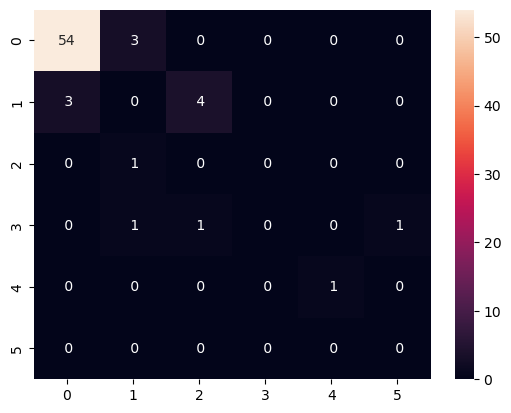


 

RandomForestClassifier(max_depth=20, n_estimators=1000)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.33      0.29      0.31         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.83        69
   macro avg       0.25      0.25      0.25        69
weighted avg       0.79      0.83      0.81        69




C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CEPL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


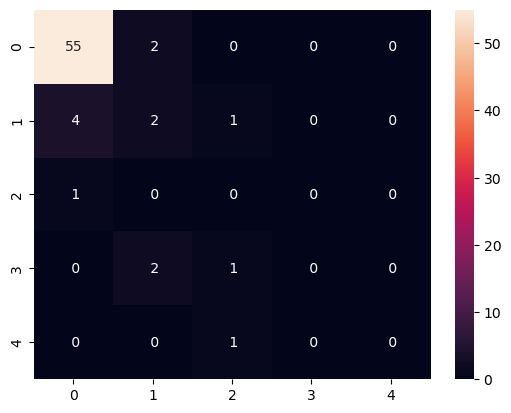

In [114]:
for i in a:
    i.fit(x_train, y_train)
    y_pred=i.predict(x_test)
    print(i)
    print()
    print(metrics.classification_report(y_test, y_pred))
    print()
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='2g')
    plt.show()
    print('\n','\n')

In [115]:
#The logistic regression has an accuracy of 0.80 and a weighted precision score of 0.79

In [116]:
#The random forest classifier has an accuracy of 0.83 and a weighted precision score of 0.79